# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Dataset 1

In [2]:
df =  pd.read_csv("Dataset/results.csv")

In [3]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
df.shape

(45315, 9)

In [5]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [6]:
df["date"] = pd.to_datetime(df["date"])

In [7]:
df.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.sort_values("date").tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
45281,2023-11-21,Hong Kong,Turkmenistan,2,2,FIFA World Cup qualification,Hong Kong,Hong Kong,False
45282,2023-11-21,Philippines,Indonesia,1,1,FIFA World Cup qualification,Manila,Philippines,False
45283,2023-11-21,Vietnam,Iraq,0,1,FIFA World Cup qualification,Hanoi,Vietnam,False
45285,2023-11-21,Jordan,Saudi Arabia,0,2,FIFA World Cup qualification,Amman,Jordan,False
45314,2023-11-21,Romania,Switzerland,1,0,UEFA Euro qualification,Bucharest,Romania,False


In [10]:
df = df[(df["date"] >= "2018-8-1")].reset_index(drop=True)

In [11]:
df.sort_values("date").tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
4855,2023-11-21,Hong Kong,Turkmenistan,2,2,FIFA World Cup qualification,Hong Kong,Hong Kong,False
4856,2023-11-21,Philippines,Indonesia,1,1,FIFA World Cup qualification,Manila,Philippines,False
4857,2023-11-21,Vietnam,Iraq,0,1,FIFA World Cup qualification,Hanoi,Vietnam,False
4859,2023-11-21,Jordan,Saudi Arabia,0,2,FIFA World Cup qualification,Amman,Jordan,False
4888,2023-11-21,Romania,Switzerland,1,0,UEFA Euro qualification,Bucharest,Romania,False


In [12]:
df.shape

(4889, 9)

## Dataset 2

In [13]:
rank = pd.read_csv("Dataset/fifa_ranking-2023-07-20.csv")

In [14]:
rank["rank_date"] = pd.to_datetime(rank["rank_date"])
rank = rank[(rank["rank_date"] >= "2018-8-1")].reset_index(drop=True)

In [15]:
rank.isna().sum()

rank               0
country_full       0
country_abrv       0
total_points       0
previous_points    0
rank_change        0
confederation      0
rank_date          0
dtype: int64

In [16]:
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,108,Central African Republic,CTA,1196.0,1196.0,0,CAF,2018-08-16
1,206,Bahamas,BAH,868.0,868.0,0,CONCACAF,2018-08-16
2,75,China PR,CHN,1320.0,1320.0,0,AFC,2018-08-16
3,74,South Africa,RSA,1327.0,1324.0,0,CAF,2018-08-16
4,73,Syria,SYR,1328.0,1328.0,0,AFC,2018-08-16


In [17]:
rank["country_full"] = rank["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States")

In [18]:
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

- rank = rank.set_index(['rank_date']): Kode ini mengatur indeks data frame rank menjadi kolom "rank_date". Ini berarti kita akan menggunakan tanggal sebagai indeks.

- .groupby(['country_full'], group_keys=False): Kode ini melakukan pengelompokan berdasarkan kolom "country_full". Parameter group_keys=False menghilangkan pembuatan indeks hierarkis dan hanya menyimpan indeks "rank_date".

- .resample('D').first(): Kode ini melakukan resampling data frame berdasarkan tanggal dengan interval harian ('D'). Resampling dengan metode .first() memilih nilai pertama pada setiap kelompok tanggal. Ini berarti kita akan memiliki data setiap hari, dengan nilai-nilai dari tanggal terdekat yang tersedia.

- .fillna(method='ffill'): Kode ini mengisi nilai-nilai yang hilang dengan metode forward fill ('ffill'). Ini berarti nilai-nilai yang hilang akan diisi dengan nilai dari baris sebelumnya.

- .reset_index(): Kode ini mengembalikan indeks "rank_date" menjadi kolom biasa dan mengembalikan data frame ke bentuk awal sebelum perubahan indeks.

In [19]:
rank.head()

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
0,2018-08-16,145.0,Afghanistan,AFG,1068.0,1068.0,0.0,AFC
1,2018-08-17,145.0,Afghanistan,AFG,1068.0,1068.0,0.0,AFC
2,2018-08-18,145.0,Afghanistan,AFG,1068.0,1068.0,0.0,AFC
3,2018-08-19,145.0,Afghanistan,AFG,1068.0,1068.0,0.0,AFC
4,2018-08-20,145.0,Afghanistan,AFG,1068.0,1068.0,0.0,AFC


## Final Dataset

In [20]:
df_wc_ranked = df.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)

In [21]:
df_wc_ranked.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points,previous_points,rank,rank_change
0,2018-08-18,Andorra,United Arab Emirates,0,0,Friendly,Grödig,Austria,True,1120.0,1120.0,130.0,0.0
1,2018-08-18,Grenada,Jamaica,1,5,Friendly,St. George's,Grenada,False,980.0,980.0,168.0,0.0
2,2018-08-18,Guatemala,Cuba,1,0,Friendly,Quetzaltenango,Guatemala,False,1064.0,1064.0,146.0,0.0
3,2018-08-20,Barbados,Jamaica,2,2,Friendly,Bridgetown,Barbados,False,1005.0,1008.0,160.0,0.0
4,2018-08-25,Anguilla,Saint Martin,1,2,Friendly,The Valley,Anguilla,False,868.0,868.0,206.0,0.0


In [22]:
df_wc_ranked = df_wc_ranked.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)

In [23]:
df_wc_ranked.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
0,2018-08-18,Andorra,United Arab Emirates,0,0,Friendly,Grödig,Austria,True,1120.0,1120.0,130.0,0.0,1312.0,1312.0,77.0,0.0
1,2018-08-18,Grenada,Jamaica,1,5,Friendly,St. George's,Grenada,False,980.0,980.0,168.0,0.0,1400.0,1400.0,54.0,0.0
2,2018-08-18,Guatemala,Cuba,1,0,Friendly,Quetzaltenango,Guatemala,False,1064.0,1064.0,146.0,0.0,940.0,940.0,181.0,0.0
3,2018-08-20,Barbados,Jamaica,2,2,Friendly,Bridgetown,Barbados,False,1005.0,1008.0,160.0,0.0,1400.0,1400.0,54.0,0.0
4,2018-08-26,Barbados,Cuba,0,0,Friendly,Bridgetown,Barbados,False,1005.0,1008.0,160.0,0.0,940.0,940.0,181.0,0.0


- Langkah ini mirip dengan langkah sebelumnya, namun kali ini penggabungan dilakukan dengan kolom "date" dan "away_team" dari data frame df.
- Karena penggabungan dilakukan terhadap kolom yang memiliki nama yang sama di kedua data frame (seperti "total_points", "previous_points", "rank", "rank_change", dan "rank_date"), maka parameter suffixes=("_home", "_away") ditambahkan untuk menambahkan sufiks pada nama kolom yang bentrok.
- Setelah penggabungan, kolom "rank_date" dan "country_full" dihapus dari hasil penggabungan menggunakan drop.

# Feature Engineering


keinginan saya adalah menciptakan fitur-fitur yang memungkinkan memprediksi pertandingan sepak bola. Secara intuitif, saya menyatakan bahwa fitur-fitur yang berdampak dapat mencakup:

- Poin pertandingan sebelumnya
- Gol yang dicetak dan diterima pada pertandingan sebelumnya
- Pentingnya pertandingan (persahabatan atau tidak)
- Peringkat tim
- Peningkatan peringkat tim
- Gol yang dicetak dan diterima berdasarkan peringkat lawan

Jadi, hal pertama yang harus dilakukan adalah membuat fitur yang menyatakan tim mana yang menang dan berapa banyak poin yang mereka raih dalam pertandingan.

In [24]:
df = df_wc_ranked

In [25]:
def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0]) # (kategori, poin away, poin home)
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = df.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)

- Fungsi ini mengambil dua parameter, yaitu home (skor tim tuan rumah) dan away (skor tim tamu).
- Pertama, fungsi memeriksa apakah skor tim tuan rumah (home) lebih besar dari skor tim tamu (away). Jika iya, itu berarti tim tuan rumah menang, dan fungsi mengembalikan Series [0, 3, 0]. Di sini, angka 0 menunjukkan bahwa tim tamu tidak mendapatkan poin, 3 menunjukkan bahwa tim tuan rumah mendapatkan 3 poin, dan 0 menunjukkan bahwa tim tamu tidak mendapatkan poin.
- Jika skor tim tuan rumah lebih kecil dari skor tim tamu, itu berarti tim tamu menang, dan fungsi mengembalikan Series [1, 0, 3]. Di sini, angka 1 menunjukkan bahwa tim tuan rumah tidak mendapatkan poin, 0 menunjukkan bahwa tim tamu tidak mendapatkan poin, dan 3 menunjukkan bahwa tim tamu mendapatkan 3 poin.
- Jika skor tim tuan rumah sama dengan skor tim tamu, itu berarti pertandingan berakhir imbang, dan fungsi mengembalikan Series [2, 1, 1]. Di sini, angka 2 menunjukkan bahwa tidak ada tim yang menang atau kalah, 1 menunjukkan bahwa kedua tim mendapatkan 1 poin masing-masing.
- df.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1): Metode .apply() digunakan untuk menerapkan fungsi result_finder pada setiap baris data frame df. Fungsi ini akan dijalankan pada setiap baris dengan skor tim tuan rumah dan tim tamu sebagai input, menghasilkan Series dengan informasi hasil pertandingan.





In [26]:
df[["result", "home_team_points", "away_team_points"]] = results

In [27]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away,result,home_team_points,away_team_points
0,2018-08-18,Andorra,United Arab Emirates,0,0,Friendly,Grödig,Austria,True,1120.0,1120.0,130.0,0.0,1312.0,1312.0,77.0,0.0,2,1,1
1,2018-08-18,Grenada,Jamaica,1,5,Friendly,St. George's,Grenada,False,980.0,980.0,168.0,0.0,1400.0,1400.0,54.0,0.0,1,0,3
2,2018-08-18,Guatemala,Cuba,1,0,Friendly,Quetzaltenango,Guatemala,False,1064.0,1064.0,146.0,0.0,940.0,940.0,181.0,0.0,0,3,0
3,2018-08-20,Barbados,Jamaica,2,2,Friendly,Bridgetown,Barbados,False,1005.0,1008.0,160.0,0.0,1400.0,1400.0,54.0,0.0,2,1,1
4,2018-08-26,Barbados,Cuba,0,0,Friendly,Bridgetown,Barbados,False,1005.0,1008.0,160.0,0.0,940.0,940.0,181.0,0.0,2,1,1


Poin pertandingan adalah 3 untuk menang, 1 untuk seri, dan 0 untuk kalah, dan berbeda dengan poin peringkat FIFA yang sudah ada dalam data. Selain itu, saya asumsikan bahwa poin peringkat FIFA dan Peringkat FIFA dari tim yang sama memiliki korelasi negatif, dan kita seharusnya hanya menggunakan salah satu dari keduanya untuk membuat fitur-fitur baru. Saya akan menganalisa asumsi tersebut dengan heatmap dibawah ini.

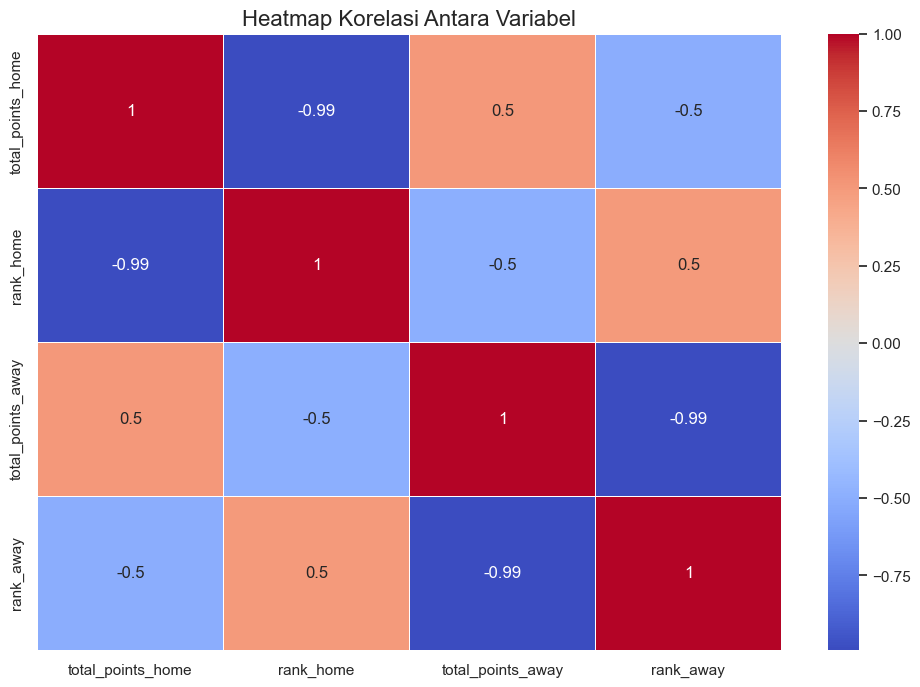

In [28]:
sns.set(style="white")
plt.figure(figsize=(12, 8))
heatmap_data = df[["total_points_home", "rank_home", "total_points_away", "rank_away"]].corr()
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Heatmap Korelasi Antara Variabel', fontsize=16)
plt.show()

Sekarang, kita membuat kolom-kolom yang akan membantu dalam pembuatan fitur-fitur: perbedaan peringkat, poin yang dimenangkan dalam pertandingan vs. peringkat tim yang dihadapi, dan perbedaan gol dalam pertandingan. Semua fitur yang bukan perbedaan harus dibuat untuk dua tim (tandang dan tuan rumah).

In [29]:
df["rank_diff"] = df["rank_home"] - df["rank_away"] # Selisih ranking antara home dan away
df["goals_diff"] = df["home_score"] - df["away_score"] # Selisih goal home & away
df["points_home_by_rank"] = df["home_team_points"]/df["rank_away"] # Point home berdasarkan rank lawan(away)
df["points_away_by_rank"] = df["away_team_points"]/df["rank_home"] # Point away berdasarkan rank lawan(home)

Untuk membuat fitur-fitur tersebut, saya akan memisahkan dataset menjadi dataset tim tuan rumah dan tim tamu, menyatukannya, dan menghitung nilai-nilai pertandingan sebelumnya. Setelah itu, saya akan memisahkan kembali dan menggabungkannya, mengembalikan dataset asli. Proses ini mengoptimalkan pembuatan fitur-fitur.

In [30]:
home_team = df[["date", "home_team", "home_score", "away_score", "rank_home", "rank_away","rank_change_home", "total_points_home", "result", "rank_diff", "points_home_by_rank", "home_team_points"]]

away_team = df[["date", "away_team", "away_score", "home_score", "rank_away", "rank_home","rank_change_away", "total_points_away", "result", "rank_diff", "points_away_by_rank", "away_team_points"]]

In [31]:
home_team.columns = [h.replace("home_", "").replace("_home", "").replace("away_", "suf_").replace("_away", "_suf") for h in home_team.columns]

away_team.columns = [a.replace("away_", "").replace("_away", "").replace("home_", "suf_").replace("_home", "_suf") for a in away_team.columns]

In [32]:
team_stats = pd.concat([home_team, away_team], ignore_index=True)#.sort_values("date")


In [33]:
# data ini digunakan untuk simulasi perhitungan fitur
team_stats_raw = team_stats.copy()

In [34]:
team_stats_raw.head()

,date,team,score,suf_score,rank,rank_suf,rank_change,total_points,result,rank_diff,points_by_rank,team_points
0,2018-08-18,Andorra,0,0,130.0,77.0,0.0,1120.0,2,53.0,0.012987,1
1,2018-08-18,Grenada,1,5,168.0,54.0,0.0,980.0,1,114.0,0.000000,0
2,2018-08-18,Guatemala,1,0,146.0,181.0,0.0,1064.0,0,-35.0,0.016575,3
3,2018-08-20,Barbados,2,2,160.0,54.0,0.0,1005.0,2,106.0,0.018519,1
4,2018-08-26,Barbados,0,0,160.0,181.0,0.0,1005.0,2,-21.0,0.005525,1



Saya akan membuat statistik seperti berikut:

1. Rata-rata gol tim dalam Siklus Piala Dunia.
2. Rata-rata gol tim dalam 5 pertandingan terakhir.
3. Rata-rata gol yang diterima tim dalam Siklus Piala Dunia.
4. Rata-rata gol yang diterima tim dalam 5 pertandingan terakhir.
5. Rata-rata Peringkat FIFA yang dihadapi tim dalam Siklus Piala Dunia.
6. Rata-rata Peringkat FIFA yang dihadapi tim dalam 5 pertandingan terakhir.
7. Poin FIFA yang dimenangkan selama siklus.
8. Poin FIFA yang dimenangkan dalam 5 pertandingan terakhir.
9. Rata-rata poin pertandingan selama siklus.
10. Rata-rata poin pertandingan dalam 5 pertandingan terakhir.
11. Rata-rata poin pertandingan berdasarkan peringkat yang dihadapi selama siklus.
12. Rata-rata poin pertandingan berdasarkan peringkat yang dihadapi dalam 5 pertandingan terakhir.

In [35]:
stats_val = []

for index, row in team_stats.iterrows():
    team = row["team"]
    date = row["date"] # Membuat data frame past_games yang berisi pertandingan-pertandingan sebelumnya untuk tim tertentu, diurutkan berdasarkan tanggal secara menurun.
    past_games = team_stats.loc[(team_stats["team"] == team) & (team_stats["date"] < date)].sort_values(by=['date'], ascending=False)
    last5 = past_games.head(5)
    
    goals = past_games["score"].mean() # Rata-rata gol untuk semua pertandingan
    goals_l5 = last5["score"].mean() # Rata-rata gol untuk lima pertandingan terakhir
    
    goals_suf = past_games["suf_score"].mean() # Rata-rata gol dengan sufiks untuk semua pertandingan
    goals_suf_l5 = last5["suf_score"].mean() # Rata-rata gol dengan sufiks untuk lima pertandingan terakhir
    
    rank = past_games["rank_suf"].mean() # Rata-rata peringkat dengan sufiks untuk semua pertandingan
    rank_l5 = last5["rank_suf"].mean() # Rata-rata peringkat dengan sufiks untuk lima pertandingan terakhir.
    
    if len(last5) > 0:
        # Poin yang diperoleh dari semua pertandingan dan dari lima pertandingan terakhir
        points = past_games["total_points"].values[0] - past_games["total_points"].values[-1]
        points_l5 = last5["total_points"].values[0] - last5["total_points"].values[-1] 
    else:
        points = 0
        points_l5 = 0
        
    gp = past_games["team_points"].mean() #  Rata-rata poin tim untuk semua pertandingan
    gp_l5 = last5["team_points"].mean() # Rata-rata poin tim untuk lima pertandingan terakhir
    
    gp_rank = past_games["points_by_rank"].mean() # Rata-rata poin per peringkat untuk semua pertandingan
    gp_rank_l5 = last5["points_by_rank"].mean() # Rata-rata poin per peringkat untuk lima pertandingan terakhir
    
    stats_val.append([goals, goals_l5, goals_suf, goals_suf_l5, rank, rank_l5, points, points_l5, gp, gp_l5, gp_rank, gp_rank_l5])

In [36]:
stats_cols = ["goals_mean", "goals_mean_l5", "goals_suf_mean", "goals_suf_mean_l5", "rank_mean", "rank_mean_l5", "points_mean", "points_mean_l5", "game_points_mean", "game_points_mean_l5", "game_points_rank_mean", "game_points_rank_mean_l5"]

stats_df = pd.DataFrame(stats_val, columns=stats_cols)

full_df = pd.concat([team_stats.reset_index(drop=True), stats_df], axis=1, ignore_index=False)

## Membagi dua data

In [37]:
# Mengambil separuh pertama dari data frame (full_df) untuk tim home.
home_team_stats = full_df.iloc[:int(full_df.shape[0]/2),:]

# Mengambil separuh kedua dari data frame (full_df) untuk tim away
away_team_stats = full_df.iloc[int(full_df.shape[0]/2):,:]

In [38]:
home_team_stats.columns[-12:]

Index(['goals_mean', 'goals_mean_l5', 'goals_suf_mean', 'goals_suf_mean_l5',
       'rank_mean', 'rank_mean_l5', 'points_mean', 'points_mean_l5',
       'game_points_mean', 'game_points_mean_l5', 'game_points_rank_mean',
       'game_points_rank_mean_l5'],
      dtype='object')

In [39]:
# Memilih 12 kolom terakhir dari data frame
home_team_stats = home_team_stats[home_team_stats.columns[-12:]]
away_team_stats = away_team_stats[away_team_stats.columns[-12:]]

In [40]:
# Memberikan prefix "home_" pada setiap nama kolom dalam data frame home_team_stats
home_team_stats.columns = ['home_'+str(col) for col in home_team_stats.columns]

# Memberikan prefix "away_" pada setiap nama kolom dalam data frame away_team_stats
away_team_stats.columns = ['away_'+str(col) for col in away_team_stats.columns]

Untuk menyatukan data, diperlukan penambahan sufiks "home" dan "away" untuk setiap kolom. Setelah itu, data siap untuk digabungkan.

In [41]:
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [42]:
full_df = pd.concat([df, match_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [43]:
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_diff', 'goals_diff', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5


Sekarang, untuk menghitung pentingnya pertandingan, saya akan buat sebuah kolom yang menentukan jenis kompetisi dari pertandingan tersebut.

In [44]:
"""Ini adalah fungsi sederhana yang mengembalikan 1 
jika nilai x sama dengan "Friendly" dan 0 jika tidak"""
def find_friendly(x):
    if x == "Friendly":
        return 1
    else: return 0

full_df["is_friendly"] = full_df["tournament"].apply(lambda x: find_friendly(x))

In [45]:
full_df = pd.get_dummies(full_df, columns=["is_friendly"])

 data frame diubah menjadi bentuk one-hot encoding untuk kolom "is_friendly". Kolom ini kemudian dihapuskan dan digantikan oleh dua kolom baru, yaitu "is_friendly_0" dan "is_friendly_1"

In [46]:
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_diff', 'goals_diff', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5

Dan setelah itu, saya akan memilih hanya kolom-kolom yang akan membantu dalam analisis fitur.

In [47]:
base_df = full_df[["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_diff", "rank_change_home", "rank_change_away", 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5','home_game_points_mean', 'home_game_points_mean_l5',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_l5','away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5',
       'is_friendly_0', 'is_friendly_1']]

base_df.tail()

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_diff,rank_change_home,...,home_game_points_mean,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1
3824,2023-07-09,Guatemala,Jamaica,116.0,63.0,0,1,1,53.0,0.0,...,1.729167,1.4,0.018088,0.023465,1.269231,1.0,0.020674,0.034487,True,False
3825,2023-07-09,United States,Canada,11.0,45.0,2,2,2,-34.0,-2.0,...,1.904110,2.2,0.055824,0.075214,1.920000,2.0,0.040238,0.023091,True,False
3826,2023-07-12,United States,Panama,11.0,57.0,1,1,2,-46.0,-2.0,...,1.891892,2.2,0.055370,0.066326,1.317460,1.4,0.030376,0.028361,True,False
3827,2023-07-12,Jamaica,Mexico,63.0,14.0,0,3,1,49.0,0.0,...,1.301887,1.4,0.020772,0.026326,1.876543,2.4,0.041127,0.039027,True,False
3828,2023-07-16,Mexico,Panama,14.0,57.0,1,0,0,-43.0,-1.0,...,1.890244,2.4,0.041206,0.038206,1.312500,1.6,0.031322,0.046543,True,False


In [48]:
base_df.isna().sum()

date                               0
home_team                          0
away_team                          0
rank_home                          0
rank_away                          0
home_score                         0
away_score                         0
result                             0
rank_diff                          0
rank_change_home                   0
rank_change_away                   0
home_goals_mean                  100
home_goals_mean_l5               100
home_goals_suf_mean              100
home_goals_suf_mean_l5           100
home_rank_mean                   100
home_rank_mean_l5                100
home_points_mean                   0
home_points_mean_l5                0
away_goals_mean                  100
away_goals_mean_l5               100
away_goals_suf_mean              100
away_goals_suf_mean_l5           100
away_rank_mean                   100
away_rank_mean_l5                100
away_points_mean                   0
away_points_mean_l5                0
h

Pertandingan dengan nilai NA adalah pertandingan di mana nilai rata-rata tidak dapat dihitung (pertandingan dari awal data). Pertandingan-pertandingan tersebut akan dihapus.

In [49]:
base_df_no_fg = base_df.dropna()

# Data Analysis

## Multivariate Analysis


Sekarang, kita perlu menganalisis semua fitur yang telah dibuat dan memeriksa apakah mereka memiliki pengaruh dalam memprediksi. Jika tidak, kita perlu membuat beberapa fitur baru yang memiliki pengaruh prediktif, seperti perbedaan antara tim tuan rumah dan tim tandang. Untuk menganalisis kekuatan prediktif, saya akan menganggap pertandingan seri sebagai kekalahan bagi tim tuan rumah dan akan membuat dalam bentuk biner.

In [50]:
df = base_df_no_fg

In [51]:
# membuat fungsi untuk mengubah seri menjadi kekalahan bagi tuan rumah
def no_draw(x):
    if x == 2:
        return 1
    else:
        return x
    
df["target"] = df["result"].apply(lambda x: no_draw(x))

Analisis yang akan dilakukan:

Violin dan boxplot untuk menganalisis apakah fitur memiliki distribusi yang berbeda berdasarkan target.
Scatter plot untuk menganalisis korelasi antar variabel.

In [52]:
# Memmbuat dua data untuk di visualisasikan 
data1 = df[list(df.columns[8:20].values) + ["target"]] #indeks 8 hingga 19 (kolom ke-8 sampai ke-19) 
data2 = df[df.columns[20:]] # Memilih kolom dari indeks 20 ke depan dari data frame

Selanjutnya, melakukan standarisasi pada nilai-nilai data pertama (data1) kecuali kolom target. Ini dilakukan untuk menghindari efek skala yang berlebihan pada visualisasi.
- Rumus Z = (x - x.mean)/ standar deviasi

In [53]:
scaled = (data1[:-1] - data1[:-1].mean()) / data1[:-1].std()
scaled["target"] = data1["target"]
violin1 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

scaled = (data2[:-1] - data2[:-1].mean()) / data2[:-1].std()
scaled["target"] = data2["target"]
violin2 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

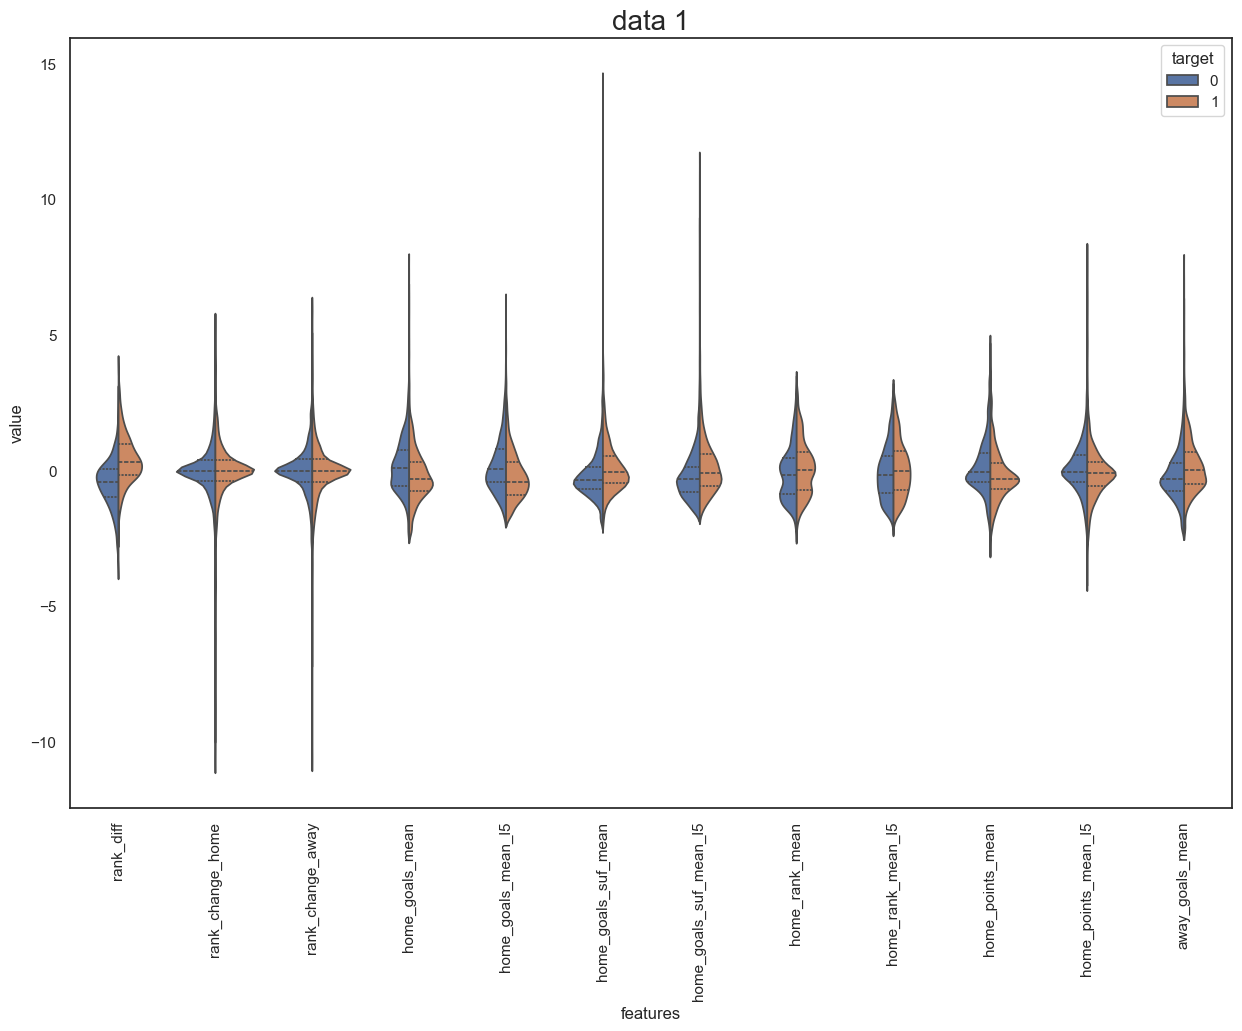

In [54]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin1,split=True, inner="quart")
plt.xticks(rotation=90)
plt.title('data 1', fontsize=20)
plt.show()

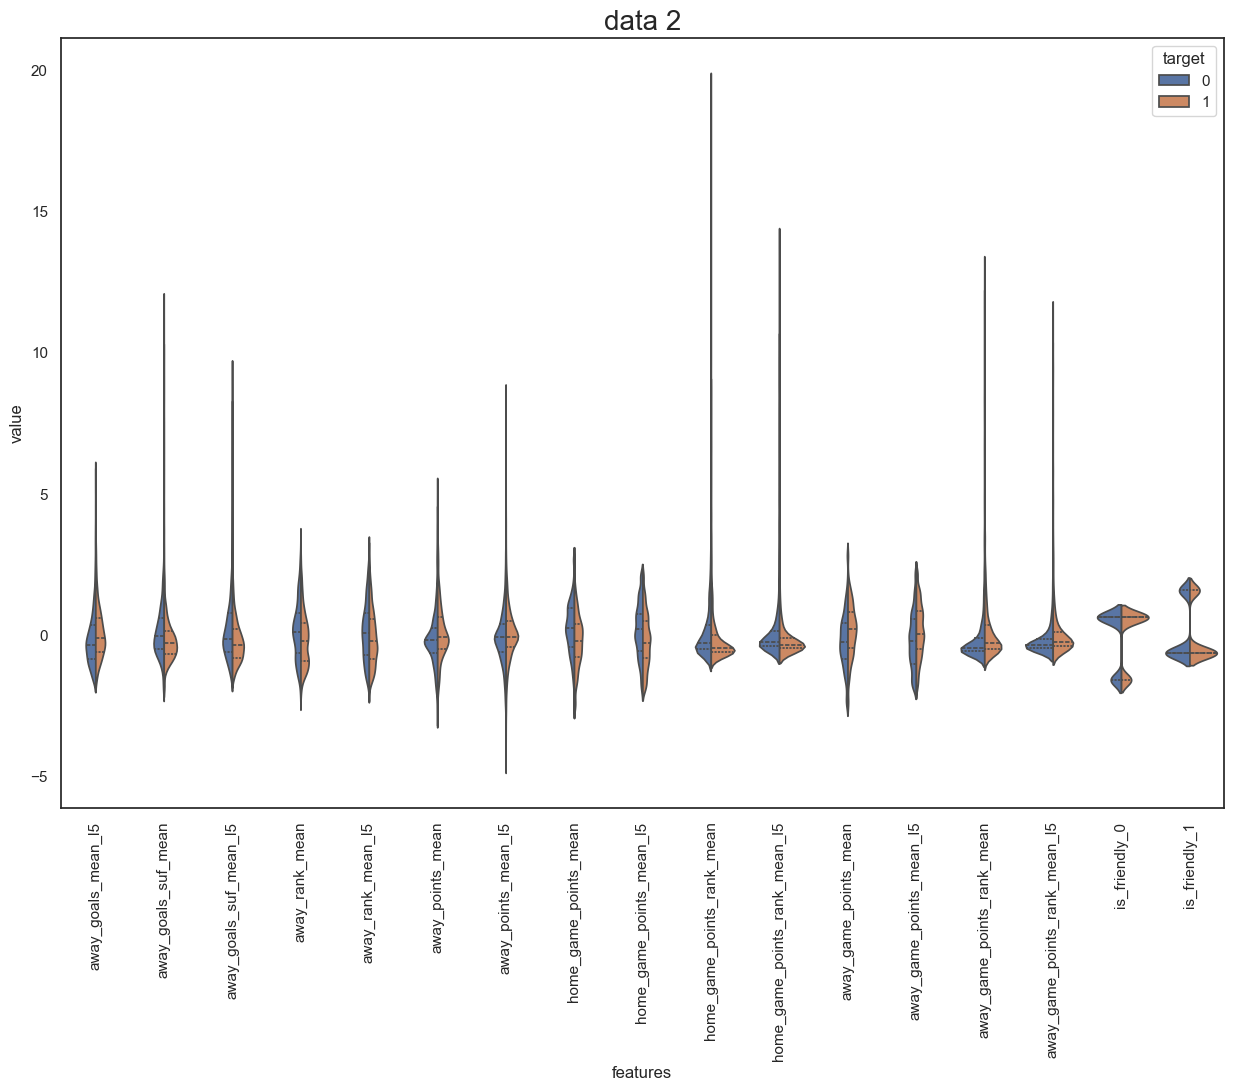

In [55]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin2,split=True, inner="quart")
plt.xticks(rotation=90)
plt.title('data 2', fontsize=20)
plt.show()

Dengan menggunakan plot, saya melihat bahwa rank_diff merupakan fitur yang baik. Selanjutnya, saya akan membuat fitur yang menghitung perbedaan antara tim tuan rumah dan tim tandang dan menganalisis apakah fitur tersebut dapat memisahkan data dengan baik.

In [56]:
dif = df.copy()
dif.loc[:, "goals_dif"] = dif["home_goals_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_mean_l5"]
dif.loc[:, "goals_suf_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_suf_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_made_suf_dif"] = dif["home_goals_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_made_suf_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_suf_made_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_suf_made_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_mean_l5"]

- goals_dif:
Menghitung perbedaan rata-rata gol tim tuan rumah dan tim tamu.

- goals_dif_l5:
Menghitung perbedaan rata-rata gol lima pertandingan terakhir tim tuan rumah dan tim tamu.

- goals_suf_dif:
Menghitung perbedaan rata-rata gol dengan sufiks tim tuan rumah dan tim tamu.

- goals_suf_dif_l5:
Menghitung perbedaan rata-rata gol dengan sufiks lima pertandingan terakhir tim tuan rumah dan tim tamu.

- goals_made_suf_dif:
Menghitung perbedaan rata-rata gol tim tuan rumah dan rata-rata gol dengan sufiks tim tamu.

- goals_made_suf_dif_l5:
Menghitung perbedaan rata-rata gol lima pertandingan terakhir tim tuan rumah dan rata-rata gol dengan sufiks lima pertandingan terakhir tim tamu.

- goals_suf_made_dif:
Menghitung perbedaan rata-rata gol dengan sufiks tim tuan rumah dan rata-rata gol tim tamu.

- goals_suf_made_dif_l5:
Menghitung perbedaan rata-rata gol dengan sufiks lima pertandingan terakhir tim tuan rumah dan rata-rata gol tim tamu.

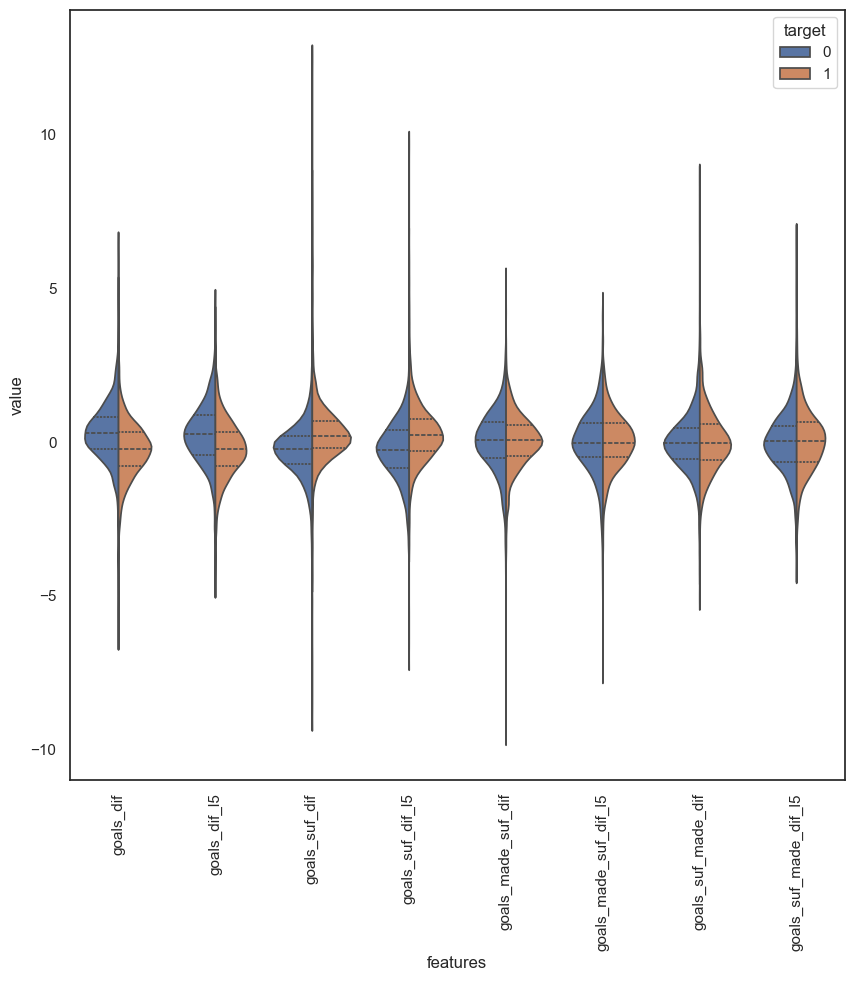

In [57]:
data_difs = dif.iloc[:, -8:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["target"] = data2["target"]
violin = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()


Pada plot tersebut, terdapat beberapa fitur yang baik yaitu :
- goals_dif
- goals_dif_l5
- goals_suf_dif
- goals_suf_dif_l5

In [58]:
# perbedaan rata-rata poin per pertandingan antara tim tuan rumah dan tim tamu.
dif.loc[:, "dif_points"] = dif["home_game_points_mean"] - dif["away_game_points_mean"]
# rata-rata poin per pertandingan lima pertandingan terakhir antara tim tuan rumah dan tim tamu.
dif.loc[:, "dif_points_l5"] = dif["home_game_points_mean_l5"] - dif["away_game_points_mean_l5"]
# perbedaan rata-rata poin per pertandingan berdasarkan peringkat antara tim tuan rumah dan tim tamu.
dif.loc[:, "dif_points_rank"] = dif["home_game_points_rank_mean"] - dif["away_game_points_rank_mean"]
# perbedaan rata-rata poin per pertandingan lima pertandingan terakhir berdasarkan peringkat antara tim tuan rumah dan tim tamu.
dif.loc[:, "dif_points_rank_l5"] = dif["home_game_points_rank_mean_l5"] - dif["away_game_points_rank_mean_l5"]

In [59]:
# perbedaan rata-rata peringkat antara tim tuan rumah dan tim tamu.
dif.loc[:, "dif_rank_agst"] = dif["home_rank_mean"] - dif["away_rank_mean"]
# perbedaan rata-rata peringkat lima pertandingan terakhir antara tim tuan rumah dan tim tamu.
dif.loc[:, "dif_rank_agst_l5"] = dif["home_rank_mean_l5"] - dif["away_rank_mean_l5"]

Saya akan menghitung gol yang dicetak dan diterima berdasarkan peringkat, dan menganalisa perbedaannya.

In [60]:
# perbedaan rata-rata gol peringkat antara tim tuan rumah dan tim tamu.
dif.loc[:, "goals_per_ranking_dif"] = (dif["home_goals_mean"] / dif["home_rank_mean"]) - (dif["away_goals_mean"] / dif["away_rank_mean"])
# perbedaan rata-rata gol dengan sufiks peringkat antara tim tuan rumah dan tim tamu.
dif.loc[:, "goals_per_ranking_suf_dif"] = (dif["home_goals_suf_mean"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean"] / dif["away_rank_mean"])
# perbedaan rata-rata gol peringkat antara tim tuan rumah dan tim tamu dalam lima pertandingan terakhir.
dif.loc[:, "goals_per_ranking_dif_l5"] = (dif["home_goals_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_mean_l5"] / dif["away_rank_mean"])
# perbedaan rata-rata gol dengan sufiks peringkat antara tim tuan rumah dan tim tamu dalam lima pertandingan terakhir.
dif.loc[:, "goals_per_ranking_suf_dif_l5"] = (dif["home_goals_suf_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean_l5"] / dif["away_rank_mean"])

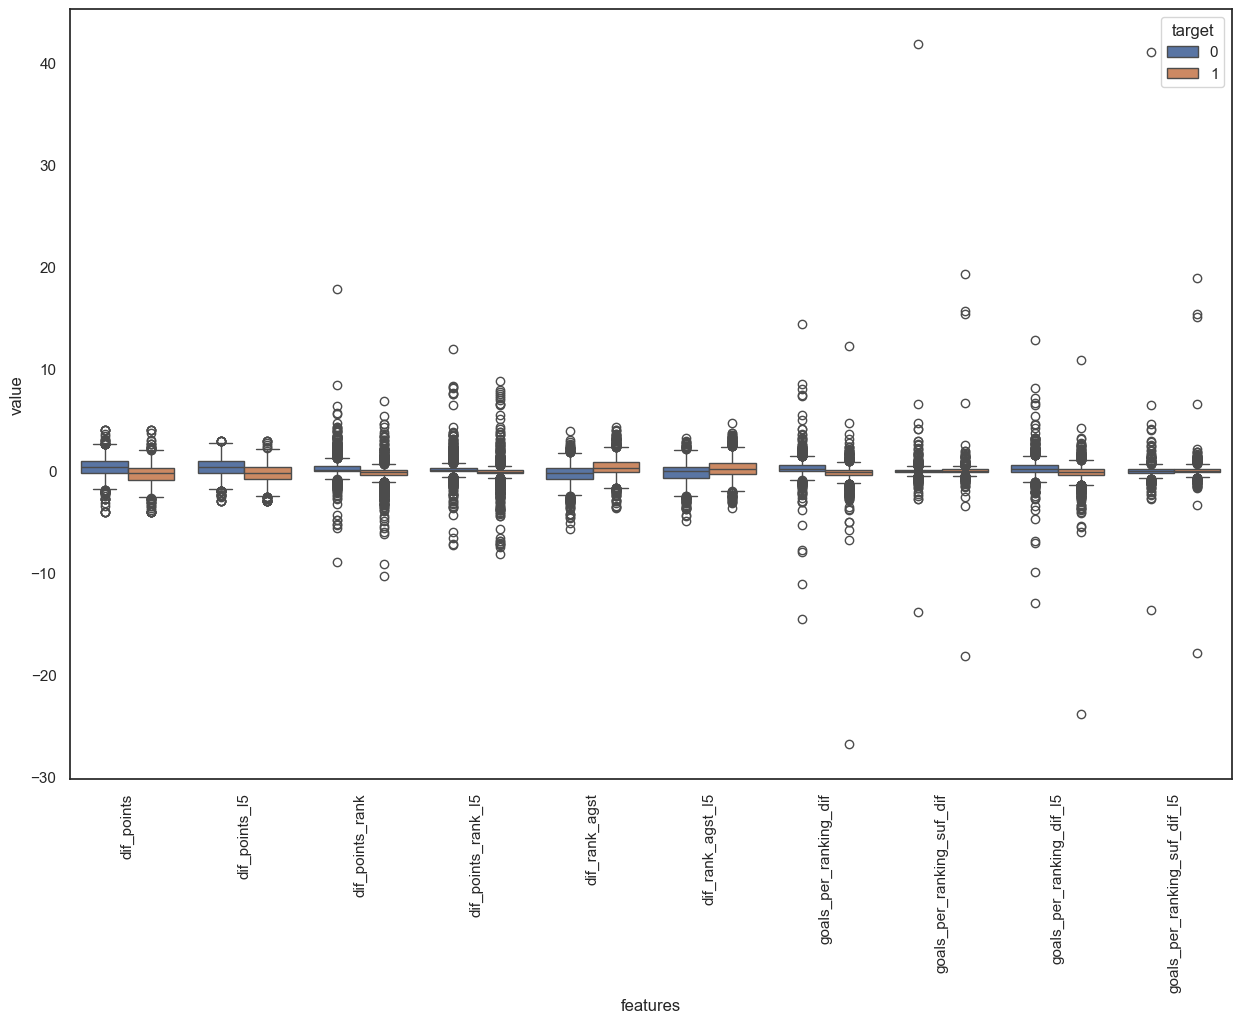

In [61]:
data_difs = dif.iloc[:, -10:] # 10 kolom terakhir
scaled = (data_difs - data_difs.mean()) / data_difs.std() # Standarisasi
scaled["target"] = data2["target"] #  Menambahkan kolom target ke dalam dataframe scaled
boxplot = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="target", data=boxplot)
plt.xticks(rotation=90)
plt.show()

fitur yang akan saya gunakan selanjutnya :
- dif_points
- dif_points_l5
- dif_points_rank
- dif_points_rank_l5
- dif_rank_agst
- dif_rank_agst_l5

Selain itu, beberapa fitur yang dihasilkan memiliki distribusi yang sangat mirip, yang akan dianalisis menggunakan scatterplot.

## Unvariate Analysis

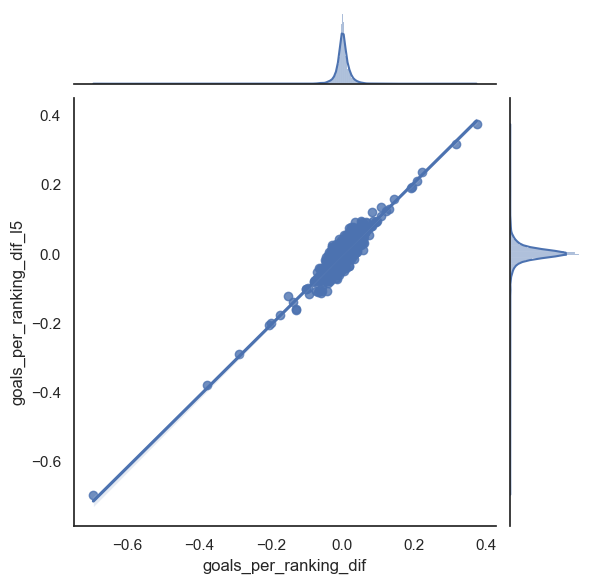

In [62]:
sns.jointplot(data = data_difs, x = 'goals_per_ranking_dif', y = 'goals_per_ranking_dif_l5', kind="reg")
plt.show()

Karena goals_per_ranking_dif dan goals_per_ranking_l5 memiliki distribusi yang sama. Oleh karena itu, saya akan menggunakan hanya versi lengkapnya (goals_per_ranking_dif).

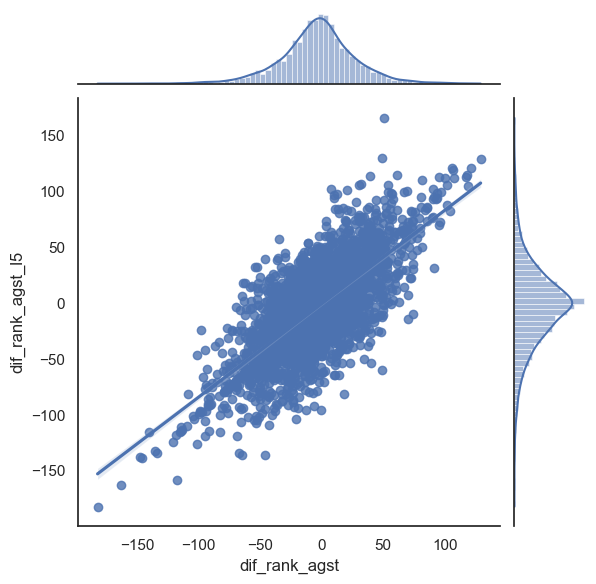

In [63]:
sns.jointplot(data = data_difs, x = 'dif_rank_agst', y = 'dif_rank_agst_l5', kind="reg")
plt.show()

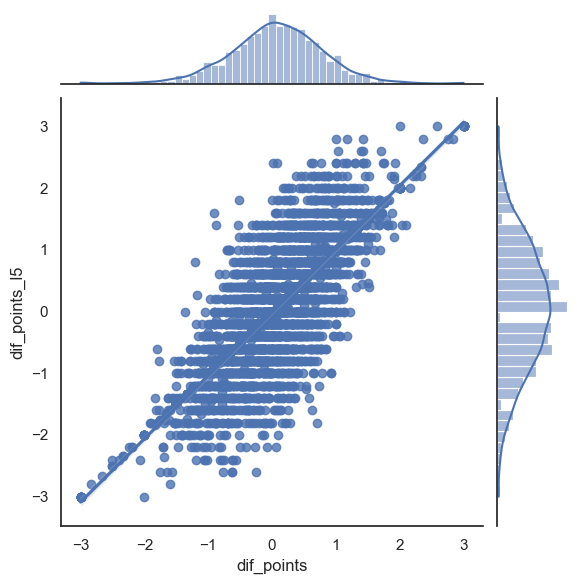

In [64]:
sns.jointplot(data = data_difs, x = 'dif_points', y = 'dif_points_l5', kind="reg")
plt.show()

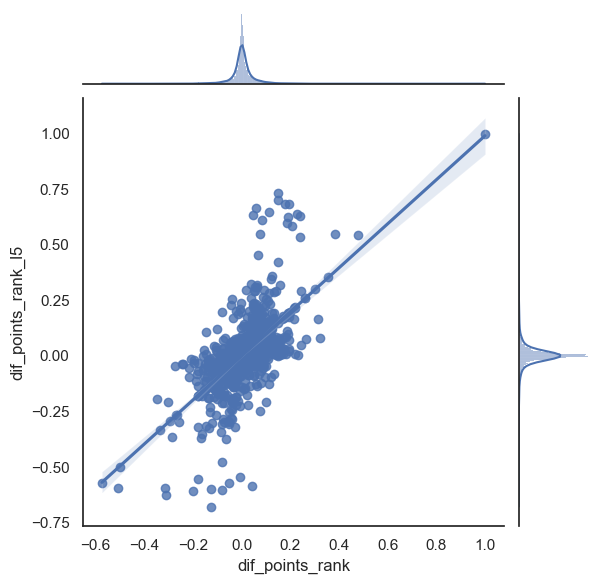

In [65]:
sns.jointplot(data = data_difs, x = 'dif_points_rank', y = 'dif_points_rank_l5', kind="reg")
plt.show()

Untuk perbedaan peringkat yang dihadapi, poin pertandingan berdasarkan peringkat yang dihadapi, dan rata-rata poin pertandingan berdasarkan peringkat yang dihadapi, kedua versi (selama seluruh pertandingan dan 5 pertandingan terakhir) tidak begitu mirip. Oleh karena itu, kita akan menggunakan keduanya.

Berdasarkan itu, fitur-fitur akhirnya (X) adalah:
- rank_dif : peringkat tim tuan rumah dan tim tamu pada saat pertandingan.
- goals_dif : perbedaan antara rata-rata jumlah gol yang dicetak oleh tim tuan rumah dan tim tamu.
- goals_dif_l5 : perbedaan antara rata-rata jumlah gol yang dicetak oleh tim tuan rumah dan tim tamu dalam lima pertandingan terakhir.
- goals_suf_dif : perbedaan antara rata-rata jumlah gol dengan sufiks yang dicetak oleh tim tuan rumah dan tim tamu.
- goals_suf_dif_l5 : perbedaan antara rata-rata jumlah gol dengan sufiks yang dicetak oleh tim tuan rumah dan tim tamu dalam lima pertandingan terakhir.
- dif_rank_agst : perbedaan antara rata-rata peringkat tim tuan rumah dan tim tamu berdasarkan pertandingan sebelumnya.
- dif_rank_agst_l5 : perbedaan antara rata-rata peringkat tim tuan rumah dan tim tamu berdasarkan pertandingan sebelumnya dalam lima pertandingan terakhir.
- goals_per_ranking_dif : perbedaan antara rasio rata-rata gol dan peringkat tim tuan rumah dan tim tamu.
- dif_points_rank : perbedaan antara rata-rata poin yang diperoleh per pertandingan dan peringkat tim tuan rumah dan tim tamu.
- dif_points_rank_l5 : perbedaan antara rata-rata poin yang diperoleh per pertandingan dan peringkat tim tuan rumah dan tim tamu dalam lima pertandingan terakhir.
- is_friendly : menunjukkan apakah pertandingan tersebut merupakan pertandingan persahabatan atau bukan. Nilai 1 menunjukkan pertandingan persahabatan, dan nilai 0 menunjukkan pertandingan non-persahabatan.

Target (y) nya adalah
- target (0,1)

yang berisi 0 artinya team away menang dan 1 artinya team home menang

In [66]:
def create_df(df):
    columns = ["home_team", "away_team", "target", "rank_diff", "home_goals_mean", "home_rank_mean", "away_goals_mean", "away_rank_mean", "home_rank_mean_l5", "away_rank_mean_l5", "home_goals_suf_mean", "away_goals_suf_mean", "home_goals_mean_l5", "away_goals_mean_l5", "home_goals_suf_mean_l5", "away_goals_suf_mean_l5", "home_game_points_rank_mean", "home_game_points_rank_mean_l5", "away_game_points_rank_mean", "away_game_points_rank_mean_l5","is_friendly_0", "is_friendly_1"]
    
    base = df.loc[:, columns]
    base.loc[:, "goals_dif"] = base["home_goals_mean"] - base["away_goals_mean"]
    base.loc[:, "goals_dif_l5"] = base["home_goals_mean_l5"] - base["away_goals_mean_l5"]
    base.loc[:, "goals_suf_dif"] = base["home_goals_suf_mean"] - base["away_goals_suf_mean"]
    base.loc[:, "goals_suf_dif_l5"] = base["home_goals_suf_mean_l5"] - base["away_goals_suf_mean_l5"]
    base.loc[:, "goals_per_ranking_dif"] = (base["home_goals_mean"] / base["home_rank_mean"]) - (base["away_goals_mean"] / base["away_rank_mean"])
    base.loc[:, "dif_rank_agst"] = base["home_rank_mean"] - base["away_rank_mean"]
    base.loc[:, "dif_rank_agst_l5"] = base["home_rank_mean_l5"] - base["away_rank_mean_l5"]
    base.loc[:, "dif_points_rank"] = base["home_game_points_rank_mean"] - base["away_game_points_rank_mean"]
    base.loc[:, "dif_points_rank_l5"] = base["home_game_points_rank_mean_l5"] - base["away_game_points_rank_mean_l5"]
    
    model_df = base[["home_team", "away_team", "target", "rank_diff", "goals_dif", "goals_dif_l5", "goals_suf_dif", "goals_suf_dif_l5", "goals_per_ranking_dif", "dif_rank_agst", "dif_rank_agst_l5", "dif_points_rank", "dif_points_rank_l5", "is_friendly_0", "is_friendly_1"]]
    return model_df

In [67]:
model_df = create_df(df)

In [68]:
model_df

,home_team,away_team,target,rank_diff,goals_dif,goals_dif_l5,goals_suf_dif,goals_suf_dif_l5,goals_per_ranking_dif,dif_rank_agst,dif_rank_agst_l5,dif_points_rank,dif_points_rank_l5,is_friendly_0,is_friendly_1
4,Barbados,Cuba,1,-21.0,2.000000,2.0,1.000000,1.0,0.037037,-92.000000,-92.0,0.018519,0.018519,False,True
6,Barbados,Cuba,1,-21.0,1.000000,1.0,0.500000,0.5,0.008511,-35.500000,-35.5,0.008897,0.008897,False,True
31,Mongolia,Guam,1,-4.0,4.000000,4.0,-1.000000,-1.0,0.021622,0.000000,0.0,0.016216,0.016216,True,False
32,Nepal,Bhutan,0,-22.0,1.000000,1.0,0.000000,0.0,0.004975,7.000000,7.0,0.000000,0.000000,True,False
33,Bangladesh,Pakistan,0,-7.0,-1.000000,-1.0,-0.500000,-0.5,-0.007200,30.500000,30.5,-0.010437,-0.010437,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3824,Guatemala,Jamaica,1,53.0,0.179487,-1.4,-0.392628,-1.2,-0.003900,33.016026,26.2,-0.002586,-0.011022,True,False
3825,United States,Canada,1,-34.0,-0.503288,0.6,-0.126575,-0.6,0.004568,-23.756438,-38.6,0.015587,0.052124,True,False
3826,United States,Panama,1,-46.0,0.481553,1.2,-0.721793,-0.6,0.013081,-8.859073,7.2,0.024994,0.037965,True,False
3827,Jamaica,Mexico,1,49.0,-0.245749,-0.4,0.338225,0.8,-0.012009,22.633124,10.6,-0.020355,-0.012701,True,False


# Modelling

In [69]:
X = model_df.iloc[:, 3:]
y = model_df[["target"]]

In [70]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

## Gradient Boost

In [72]:
gb = GradientBoostingClassifier(random_state=42)

params = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

gb_cv = GridSearchCV(gb, params, cv = 3, n_jobs = -1, verbose = 1)

gb_cv.fit(X_train.values, np.ravel(y_train))
# Menampilkan parameter terbaik
print("Parameter Terbaik:", gb_cv.best_params_)

# Akurasi training
y_pred_train = gb_cv.predict(X_train.values)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Akurasi Training: {accuracy_train * 100:.2f}%")

# Akurasi testing
y_pred_test = gb_cv.predict(X_test.values)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Akurasi Testing: {accuracy_test * 100:.2f}%")

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
Parameter Terbaik: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Akurasi Training: 74.83%
Akurasi Testing: 69.28%


## Random Forest

In [73]:
rf = RandomForestClassifier(random_state=42) # random_state memberikan hasil yang konsisten setiap kali dijalankan
params_rf = {
    "max_depth": [None, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_leaf_nodes": [None, 50, 100, 150, 200],
    "n_estimators": [100, 150, 200, 250],
    "max_features": ["sqrt"]
}

rf_cv = GridSearchCV(rf, params_rf, cv=3, n_jobs=-1, verbose=1)
rf_cv.fit(X_train.values, np.ravel(y_train)) 

# Menampilkan parameter terbaik
print("Parameter Terbaik:", rf_cv.best_params_)

# Akurasi training
y_pred_train = rf_cv.predict(X_train.values)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Akurasi Training: {accuracy_train * 100:.2f}%")

# Akurasi testing
y_pred_test = rf_cv.predict(X_test.values)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Akurasi Testing: {accuracy_test * 100:.2f}%")

Fitting 3 folds for each of 960 candidates, totalling 2880 fits
Parameter Terbaik: {'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 100, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Akurasi Training: 84.34%
Akurasi Testing: 70.50%


- max_depth: Maksimum kedalaman dari setiap pohon. Mengurangi nilai ini dapat membantu mencegah overfitting.

- min_samples_split: Jumlah minimum sampel yang diperlukan untuk melakukan split pada node internal. Menambahkan nilai ini dapat mencegah overfitting.

- min_samples_leaf: Jumlah minimum sampel yang diperlukan pada setiap leaf. Menambahkan nilai ini dapat mencegah overfitting.

- max_leaf_nodes: Maksimum jumlah leaf dalam setiap pohon. Menambahkan nilai ini dapat membantu mencegah overfitting.

- max_features: Jumlah fitur maksimum yang dipertimbangkan untuk split pada setiap pohon. Memilih nilai yang lebih rendah dapat membantu mencegah overfitting.

- n_estimators: Jumlah pohon keputusan dalam ensemble. Sejumlah pohon yang lebih besar cenderung memberikan performa yang lebih baik, tetapi dengan biaya komputasional(waktu) yang lebih tinggi.

- cv=3: Model akan dievaluasi menggunakan skema cross-validation 3 lipatan.
- n_jobs=-1: Pekerjaan akan dieksekusi secara paralel, menggunakan semua inti CPU yang tersedia.
- verbose=1: menghasilkan keluaran yang informatif

Fun fact :
Nilai populer yang dipilih di seluruh dunia untuk keadaan acak adalah 42.

# Simulasi menggunakan RandomForest

## Grup kualifikasi

In [74]:
from operator import itemgetter
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

In [75]:
# Data grup WC 2022
# Team, Points, Win Probability
group = {'A': [['Qatar', 0, []],
  ['Ecuador', 0, []],
  ['Senegal', 0, []],
  ['Netherlands', 0, []]],
 'B': [['England', 0, []],
  ['Iran', 0, []],
  ['United States', 0, []],
  ['Wales', 0, []]],
 'C': [['Argentina', 0, []],
  ['Saudi Arabia', 0, []],
  ['Mexico', 0, []],
  ['Poland', 0, []]],
 'D': [['France', 0, []],
  ['Australia', 0, []],
  ['Denmark', 0, []],
  ['Tunisia', 0, []]],
 'E': [['Spain', 0, []],
  ['Costa Rica', 0, []],
  ['Germany', 0, []],
  ['Japan', 0, []]],
 'F': [['Belgium', 0, []],
  ['Canada', 0, []],
  ['Morocco', 0, []],
  ['Croatia', 0, []]],
 'G': [['Brazil', 0, []],
  ['Serbia', 0, []],
  ['Switzerland', 0, []],
  ['Cameroon', 0, []]],
 'H': [['Portugal', 0, []],
  ['Ghana', 0, []],
  ['Uruguay', 0, []],
  ['South Korea', 0, []]]}

In [76]:
import itertools as it
matches = [] # List untuk menyimpan hasil pertandingan antar tim dalam fase grup

# Membuat semua kemungkinan pertandingan antar tim dalam grup
for k in group:
    v = group[k]
    l = []
    for i in v:
        l.append(i[0])
    for e in it.combinations(l, 2):
        matches.append((k,e[0],e[1]))

In [77]:
matches[:10]

[('A', 'Qatar', 'Ecuador'),
 ('A', 'Qatar', 'Senegal'),
 ('A', 'Qatar', 'Netherlands'),
 ('A', 'Ecuador', 'Senegal'),
 ('A', 'Ecuador', 'Netherlands'),
 ('A', 'Senegal', 'Netherlands'),
 ('B', 'England', 'Iran'),
 ('B', 'England', 'United States'),
 ('B', 'England', 'Wales'),
 ('B', 'Iran', 'United States')]

## Membuat statistik dan fitur

In [78]:
def find_stats(team_1):
#team_1 = "Qatar"
    past_games = team_stats_raw[(team_stats_raw["team"] == team_1)].sort_values("date")
    last5 = team_stats_raw[(team_stats_raw["team"] == team_1)].sort_values("date").tail(5)

    team_1_rank = past_games["rank"].values[-1]
    team_1_goals = past_games.score.mean()
    team_1_goals_l5 = last5.score.mean()
    team_1_goals_suf = past_games.suf_score.mean()
    team_1_goals_suf_l5 = last5.suf_score.mean()
    team_1_rank_suf = past_games.rank_suf.mean()
    team_1_rank_suf_l5 = last5.rank_suf.mean()
    team_1_gp_rank = past_games.points_by_rank.mean()
    team_1_gp_rank_l5 = last5.points_by_rank.mean()

    return [team_1_rank, team_1_goals, team_1_goals_l5, team_1_goals_suf, team_1_goals_suf_l5, team_1_rank_suf, team_1_rank_suf_l5, team_1_gp_rank, team_1_gp_rank_l5]

In [79]:
def find_features(team_1, team_2):
    rank_dif = team_1[0] - team_2[0]
    goals_dif = team_1[1] - team_2[1]
    goals_dif_l5 = team_1[2] - team_2[2]
    goals_suf_dif = team_1[3] - team_2[3]
    goals_suf_dif_l5 = team_1[4] - team_2[4]
    goals_per_ranking_dif = (team_1[1]/team_1[5]) - (team_2[1]/team_2[5])
    dif_rank_agst = team_1[5] - team_2[5]
    dif_rank_agst_l5 = team_1[6] - team_2[6]
    dif_gp_rank = team_1[7] - team_2[7]
    dif_gp_rank_l5 = team_1[8] - team_2[8]
    
    return [rank_dif, goals_dif, goals_dif_l5, goals_suf_dif, goals_suf_dif_l5, goals_per_ranking_dif, dif_rank_agst, dif_rank_agst_l5, dif_gp_rank, dif_gp_rank_l5, 1, 0]

Karena model ini mensimulasikan apakah tim 1 akan menang atau tidak, maka perlu dibuat beberapa kriteria untuk menentukan hasil seri. Selain itu, karena kita tidak punya keunggulan sebagai tuan rumah di Piala Dunia, skema saya adalah memprediksi pertandingan dua kali, mengganti tim 1 dan tim 2. Tim dengan probabilitas rata-rata tertinggi akan ditetapkan sebagai pemenang. Pada fase grup, jika tim 1 menang sebagai "home_team" dan kalah sebagai "away_team", atau jika tim 2 menang sebagai "home_team" dan kalah di tim 1, maka pertandingan tersebut akan dinyatakan seri.

In [80]:
advanced_group = []
last_group = ""

# Inisialisasi skor dan probabilitas
for k in group.keys():
    for t in group[k]:
        t[1] = 0
        t[2] = []

# Melakukan simulasi pertandingan dalam fase grup       
for teams in matches:
    draw = False
    team_1 = find_stats(teams[1])
    team_2 = find_stats(teams[2])
 
    # Mendapatkan fitur dan probabilitas menggunakan model Random Forest
    features_g1 = find_features(team_1, team_2)
    features_g2 = find_features(team_2, team_1)
    probs_g1 = rf_cv.predict_proba([features_g1])
    probs_g2 = rf_cv.predict_proba([features_g2])
    
    # Mendapatkan probabilitas untuk masing-masing tim
    team_1_prob_g1 = probs_g1[0][0]
    team_1_prob_g2 = probs_g2[0][1]
    team_2_prob_g1 = probs_g1[0][1]
    team_2_prob_g2 = probs_g2[0][0]

    # Mencari nilai rata-rata dari probabilitas kemenangan tim pada dua skenario yang mungkin
    team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
    team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
    
    # Menentukan hasil pertandingan dan mengupdate skor
    if ((team_1_prob_g1 > team_2_prob_g1) & (team_2_prob_g2 > team_1_prob_g2)) | ((team_1_prob_g1 < team_2_prob_g1) & (team_2_prob_g2 < team_1_prob_g2)):
        draw=True
        for i in group[teams[0]]:
            if i[0] == teams[1] or i[0] == teams[2]:
                i[1] += 1
                
    elif team_1_prob > team_2_prob:
        winner = teams[1]
        winner_proba = team_1_prob
        for i in group[teams[0]]:
            if i[0] == teams[1]:
                i[1] += 3
                
    elif team_2_prob > team_1_prob:  
        winner = teams[2]
        winner_proba = team_2_prob
        for i in group[teams[0]]:
            if i[0] == teams[2]:
                i[1] += 3
    
    # Menyimpan probabilitas untuk kriteria desempate atau penentuan urutan
    for i in group[teams[0]]:
            if i[0] == teams[1]:
                i[2].append(team_1_prob)
            if i[0] == teams[2]:
                i[2].append(team_2_prob)

    # Output hasil pertandingan
    if last_group != teams[0]:
        if last_group != "":
            print("\n")
            print("Group %s advanced: "%(last_group))
            
            for i in group[last_group]: # Menyimpan nilai rata-rata probabilitas
                i[2] = np.mean(i[2])
            
            final_points = group[last_group]
            final_table = sorted(final_points, key=itemgetter(1, 2), reverse = True)
            advanced_group.append([final_table[0][0], final_table[1][0]])
            for i in final_table:
                print("%s -------- %d"%(i[0], i[1]))
        print("\n")
        print("-"*10+" Starting Analysis for Group %s "%(teams[0])+"-"*10)
        
     # Output hasil pertandingan (draw atau kemenangan)
    if draw == False:
        print("Group %s - %s vs. %s: Winner %s with %.2f probability"%(teams[0], teams[1], teams[2], winner, winner_proba))
    else:
        print("Group %s - %s vs. %s: Draw"%(teams[0], teams[1], teams[2]))
    last_group =  teams[0]

# Output hasil akhir fase grup
print("\n")
print("Group %s advanced: "%(last_group))

for i in group[last_group]: # Menyimpan nilai rata-rata probabilitas
    i[2] = np.mean(i[2])
            
final_points = group[last_group]
final_table = sorted(final_points, key=itemgetter(1, 2), reverse = True)
advanced_group.append([final_table[0][0], final_table[1][0]])
for i in final_table:
    print("%s -------- %d"%(i[0], i[1]))



---------- Starting Analysis for Group A ----------
Group A - Qatar vs. Ecuador: Winner Ecuador with 0.68 probability
Group A - Qatar vs. Senegal: Winner Senegal with 0.55 probability
Group A - Qatar vs. Netherlands: Winner Netherlands with 0.79 probability
Group A - Ecuador vs. Senegal: Draw
Group A - Ecuador vs. Netherlands: Winner Netherlands with 0.70 probability
Group A - Senegal vs. Netherlands: Winner Netherlands with 0.65 probability


Group A advanced: 
Netherlands -------- 9
Ecuador -------- 4
Senegal -------- 4
Qatar -------- 0


---------- Starting Analysis for Group B ----------
Group B - England vs. Iran: Winner England with 0.64 probability
Group B - England vs. United States: Winner England with 0.60 probability
Group B - England vs. Wales: Winner England with 0.77 probability
Group B - Iran vs. United States: Winner United States with 0.67 probability
Group B - Iran vs. Wales: Winner Iran with 0.55 probability
Group B - United States vs. Wales: Winner United States w



Group B advanced: 
England -------- 9
United States -------- 6
Iran -------- 3
Wales -------- 0


---------- Starting Analysis for Group C ----------
Group C - Argentina vs. Saudi Arabia: Winner Argentina with 0.81 probability
Group C - Argentina vs. Mexico: Winner Argentina with 0.68 probability
Group C - Argentina vs. Poland: Winner Argentina with 0.73 probability
Group C - Saudi Arabia vs. Mexico: Winner Mexico with 0.78 probability
Group C - Saudi Arabia vs. Poland: Winner Poland with 0.72 probability
Group C - Mexico vs. Poland: Draw


Group C advanced: 
Argentina -------- 9
Mexico -------- 4
Poland -------- 4
Saudi Arabia -------- 0


---------- Starting Analysis for Group D ----------
Group D - France vs. Australia: Winner France with 0.69 probability
Group D - France vs. Denmark: Winner France with 0.62 probability
Group D - France vs. Tunisia: Winner France with 0.72 probability
Group D - Australia vs. Denmark: Draw
Group D - Australia vs. Tunisia: Draw
Group D - Denmark vs.

1. Inisialisasi dan Persiapan Data Awal:
- Iterasi pertama (for k in group.keys()): Mengatur ulang skor awal dan daftar hasil pertandingan (t[1] dan t[2]) setiap tim dalam setiap grup.

2. Simulasi Pertandingan dan Pemrosesan Hasil:
- Loop kedua (for teams in matches): Untuk setiap pertandingan, model memprediksi probabilitas kemenangan masing-masing tim (probs_g1 dan probs_g2).
- Hasil dari prediksi probabilitas digunakan untuk menentukan pemenang atau apakah pertandingan berakhir imbang. Skor dan hasil pertandingan kemudian diupdate dalam struktur data grup.
- Jika pertandingan berakhir imbang, poin ditambahkan sesuai dengan aturan imbang.

3. Analisis Hasil Setiap Grup:
- Kode mencetak hasil pertandingan dan pemenang setiap pertandingan dalam setiap grup.
- Jika sudah selesai menganalisis satu grup, maka tabel akhir grup tersebut dicetak dan tim yang lolos ke babak berikutnya ditambahkan ke advanced_group.

4. Penanganan Grup Terakhir:
- Setelah menganalisis semua grup, hasil akhir dari grup terakhir juga dicetak, dan tim yang lolos ke babak berikutnya ditambahkan ke advanced_group.

In [81]:
print(advanced_group)

[['Netherlands', 'Ecuador'], ['England', 'United States'], ['Argentina', 'Mexico'], ['France', 'Denmark'], ['Spain', 'Germany'], ['Belgium', 'Croatia'], ['Brazil', 'Switzerland'], ['Portugal', 'Uruguay']]


## Playoff

In [82]:
advanced = advanced_group

In [83]:
playoffs = {"Round of 16": [], "Quarter-Final": [], "Semi-Final": [], "Final": []}

In [84]:
# Inisialisasi hasil pertandingan pada setiap tahap playoff
for p in playoffs.keys():
    playoffs[p] = []

# Variabel untuk melacak babak playoff sebelumnya
actual_round = ""
# List untuk menyimpan tim-tim yang lolos ke babak playoff berikutnya
next_rounds = []

# Loop untuk simulasi setiap tahap playoff
for p in playoffs.keys():
    if p == "Round of 16": # Tahap pertama (Round of 16)
        control = []  # Membuat daftar tim untuk pertandingan Round of 16
        for a in range(0, len(advanced*2), 1):
            if a < len(advanced):
                if a % 2 == 0:
                    control.append((advanced*2)[a][0])
                else:
                    control.append((advanced*2)[a][1])
            else:
                if a % 2 == 0:
                    control.append((advanced*2)[a][1])
                else:
                    control.append((advanced*2)[a][0])
        
         # Menetapkan pertandingan untuk Round of 16
        playoffs[p] = [[control[c], control[c+1]] for c in range(0, len(control)-1, 1) if c%2 == 0]
        
        # Loop untuk simulasi setiap pertandingan
        for i in range(0, len(playoffs[p]), 1):
            game = playoffs[p][i]
            
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)

            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)

            # Menggunakan model Random Forest untuk mendapatkan probabilitas
            probs_g1 = rf_cv.predict_proba([features_g1])
            probs_g2 = rf_cv.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            # Output hasil simulasi pertandingan
            if actual_round != p:
                print("-"*10)
                print("Starting simulation of %s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, away, team_2_prob))
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, home, team_1_prob))
                next_rounds.append(home)

             # Menyimpan hasil probabilitas untuk pertandingan
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p
    
     # Tahap playoff berikutnya setelah Round of 16 (Quarter-Final, Semi-Final, dan Final)
    else:
        # Menetapkan pertandingan untuk tahap playoff
        playoffs[p] = [[next_rounds[c], next_rounds[c+1]] for c in range(0, len(next_rounds)-1, 1) if c%2 == 0]
        next_rounds = []

        # Loop untuk simulasi setiap pertandingan
        for i in range(0, len(playoffs[p])):
            game = playoffs[p][i]
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)
            
            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            # Menggunakan model Random Forest untuk mendapatkan probabilitas
            probs_g1 = rf_cv.predict_proba([features_g1])
            probs_g2 = rf_cv.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
             # Output hasil simulasi pertandingan
            if actual_round != p:
                print("-"*10)
                print("Starting simulation of %s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, away, team_2_prob))
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, home, team_1_prob))
                next_rounds.append(home)
                
            # Menyimpan hasil probabilitas untuk pertandingan
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p

----------
Starting simulation of Round of 16
----------


Netherlands vs. United States: United States advances with prob 0.51
Argentina vs. Denmark: Argentina advances with prob 0.69
Spain vs. Croatia: Spain advances with prob 0.67
Brazil vs. Uruguay: Brazil advances with prob 0.68
Ecuador vs. England: England advances with prob 0.78
Mexico vs. France: France advances with prob 0.62
Germany vs. Belgium: Belgium advances with prob 0.61
Switzerland vs. Portugal: Portugal advances with prob 0.61
----------
Starting simulation of Quarter-Final
----------


United States vs. Argentina: Argentina advances with prob 0.63


Spain vs. Brazil: Spain advances with prob 0.54
England vs. France: England advances with prob 0.52
Belgium vs. Portugal: Portugal advances with prob 0.53
----------
Starting simulation of Semi-Final
----------


Argentina vs. Spain: Argentina advances with prob 0.53
England vs. Portugal: England advances with prob 0.56
----------
Starting simulation of Final
----------


Argentina vs. England: England advances with prob 0.54


1. Inisialisasi Playoff:
- Pertama-tama, inisialisasi playoff dengan mengosongkan hasil pertandingan untuk setiap ronde (for p in playoffs.keys()).

2. Ronde 16:
- Jika rondenya adalah "Round of 16", maka pertandingan diatur dengan mengambil tim-tim yang lolos dari fase grup (advanced).
- Setiap pertandingan dihitung dengan model prediksi (rf_cv), dan hasilnya dicetak. Tim yang lolos ke ronde berikutnya ditentukan berdasarkan probabilitas kemenangan yang diprediksi.
- Hasil pertandingan dan tim yang lolos dicetak.

3. Ronde Berikutnya:
- Untuk ronde-ronde berikutnya setelah "Round of 16", hasil playoff sebelumnya digunakan untuk menentukan pertandingan-pertandingan baru.
- Tim yang lolos dari ronde sebelumnya menjadi input untuk pertandingan berikutnya.
- Proses prediksi dan penentuan tim yang lolos dilakukan seperti pada "Round of 16".
- Hasil pertandingan dan tim yang lolos dicetak.

4. Simulasi dan Cetak Hasil:
- Selama simulasi setiap ronde playoff, hasil pertandingan dan tim yang lolos dicetak.
- Informasi diawali dengan mencetak header yang menunjukkan dimulainya simulasi suatu ronde playoff.

5. Penyimpanan Hasil dan Probabilitas:
- Hasil dan probabilitas masing-masing pertandingan disimpan dalam struktur data playoff untuk dianalisis lebih lanjut atau untuk keperluan presentasi.

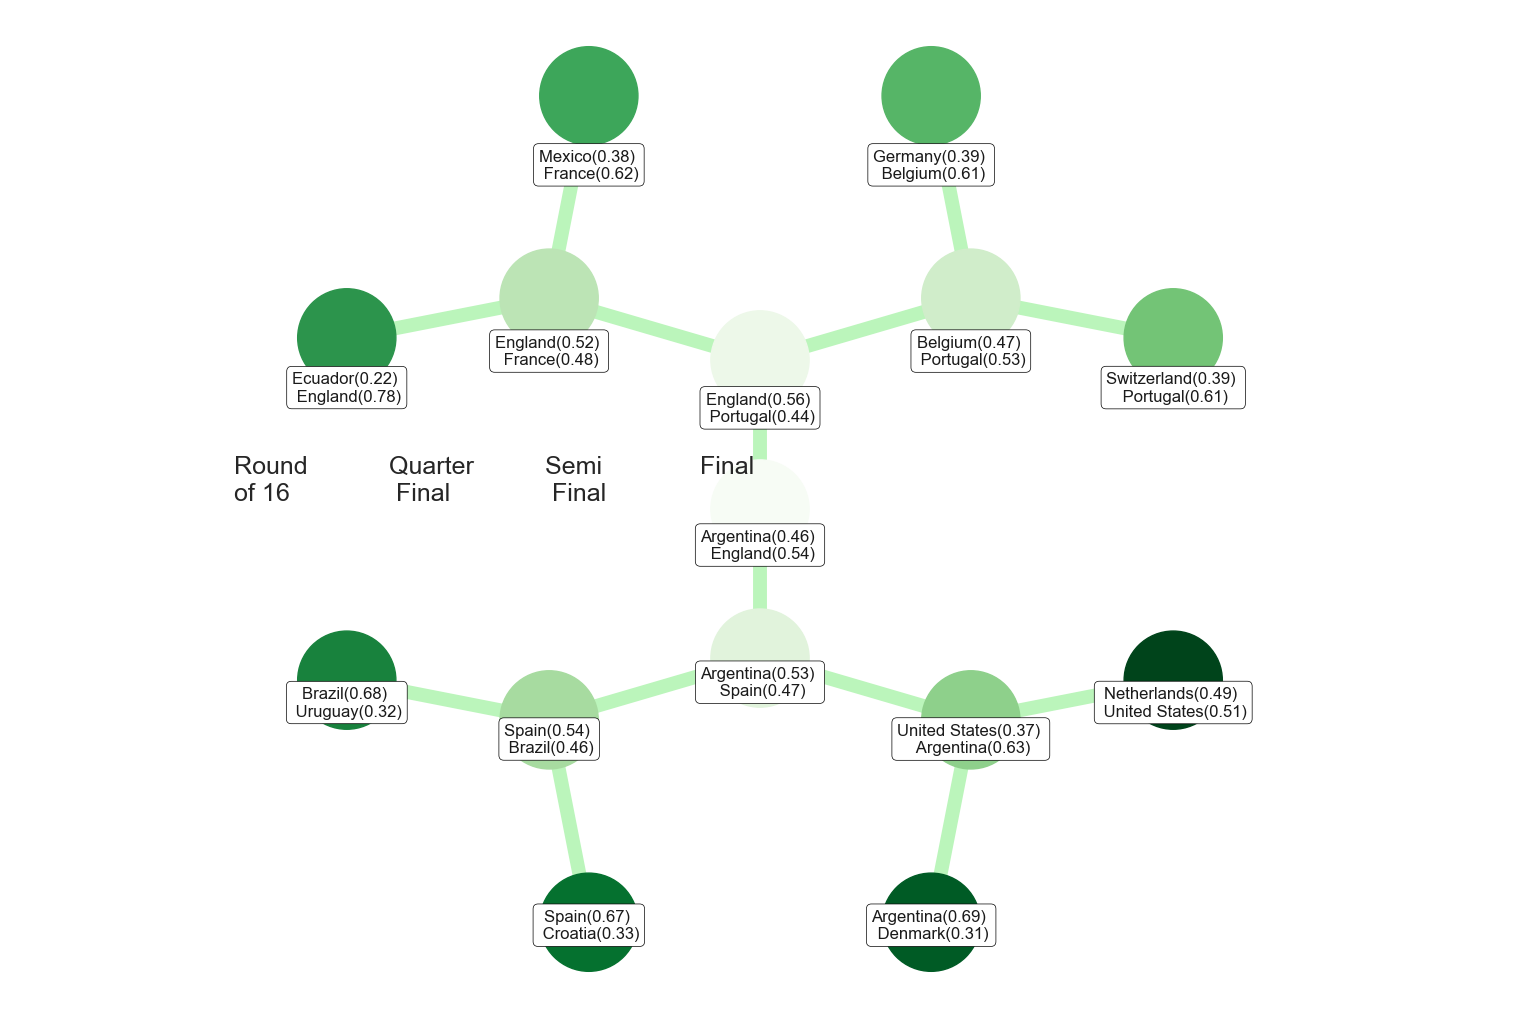

In [85]:
plt.figure(figsize=(15, 10))
# Membuat pohon turnamen dengan 2 anak setiap node dan kedalaman 3 tingkat
G = nx.balanced_tree(2, 3) 

# Inisialisasi label untuk setiap pertandingan pada setiap babak playoff
labels = []

# Mendapatkan label dari hasil pertandingan dan probabilitasnya 
for p in playoffs.keys():
    for game in playoffs[p]:
        label = f"{game[0]}({round(game[2][0], 2)}) \n {game[1]}({round(game[2][1], 2)})"
        labels.append(label)

# Membuat dictionary untuk menyimpan label dan mengatur posisi label pada diagram    
labels_dict = {}
labels_rev = list(reversed(labels))

for l in range(len(list(G.nodes))):
    labels_dict[l] = labels_rev[l]

# Mengatur posisi node pada diagram menggunakan layout graphviz
pos = graphviz_layout(G, prog='twopi')
labels_pos = {n: (k[0], k[1]-0.08*k[1]) for n,k in pos.items()}
center  = pd.DataFrame(pos).mean(axis=1).mean()
    

# Membuat visualisasi diagram menggunakan networkx dan matplotlib
# Menyesuaikan warna node, lebar garis, dan ukuran node
nx.draw(G, pos = pos, with_labels=False, node_color=range(15), edge_color="#bbf5bb", width=10, font_weight='bold',cmap=plt.cm.Greens, node_size=5000)

# Menambahkan label pada setiap node
nx.draw_networkx_labels(G, pos = labels_pos, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=.5, alpha=1),
                        labels=labels_dict)

# Menambahkan teks pada posisi yang ditentukan
texts = ["Round \nof 16", "Quarter \n Final", "Semi \n Final", "Final\n"]
pos_y = pos[0][1] + 55
for text in reversed(texts):
    pos_x = center
    pos_y -= 75 
    plt.text(pos_y, pos_x, text, fontsize = 18)

plt.axis('equal') # Menyesuaikan skala sumbu x dan y
plt.show() # Menampilkan diagram


Berdasarkan grafik diatas, pada babak final England sedikit diunggulkan daripada Argentina dengan probabilitas 54% : 46%. Oleh karena itu secara teoritis, England kemungkinan akan menjadi juara pada kompetisi tersebut